In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a8fd0a42de5d34cfa07fbf5f2d3fc00


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        print(city)
# Print the city count to confirm sufficient count.
len(cities)

kodiak
albany
ulladulla
carnarvon
avarua
new norfolk
upernavik
dingle
saint-philippe
nikolskoye
kapaa
iqaluit
nizhneyansk
kaniama
atuona
ushuaia
vaini
bahia honda
sambava
haines junction
rikitea
mys shmidta
babushkin
tecoanapa
bathsheba
longyearbyen
severo-kurilsk
dinar
barra da estiva
moorhead
haapiti
ribeira grande
taolanaro
busselton
urucara
dikson
qaanaaq
lebu
cidreira
mataura
beisfjord
cape town
morondava
hermanus
khatanga
roald
humaita
illoqqortoormiut
port alfred
central point
te anau
arraial do cabo
hobart
abu dhabi
hithadhoo
west wendover
joshimath
meulaboh
guerrero negro
lorengau
katsuura
norman wells
punta arenas
oktyabrskoye
san carlos de bariloche
tsihombe
marienburg
rapid valley
orcopampa
barrow
hamilton
ocampo
ostrovnoy
tiksi
kavaratti
pionerskiy
kiri buru
maniitsoq
kilindoni
porto tolle
castro
boyolangu
chicama
surt
talnakh
port elizabeth
belushya guba
springbok
groningen
aswan
attawapiskat
xuddur
mar del plata
torbay
cuamba
balsas
jamestown
zverinogolovskoye
bluff
san 

632

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ulladulla
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | kaniama
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | bahia honda
Processing Record 19 of Set 1 | sambava
Processing Record 20 of Set 1 | haines junction
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | mys shmidta
City not f

Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | pechenga
Processing Record 43 of Set 4 | mpika
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | kendari
Processing Record 47 of Set 4 | kigorobya
Processing Record 48 of Set 4 | kyrksaeterora
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | pindwara
Processing Record 1 of Set 5 | taybad
Processing Record 2 of Set 5 | odweyne
Processing Record 3 of Set 5 | erdenet
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | emerald
Processing Record 6 of Set 5 | emilio carranza
Processing Record 7 of Set 5 | asyut
Processing Record 8 of Set 5 | yermish
Processing Record 9 of Set 5 | aleksandrov gay
Processing Record 10 of Set 5 | west bay
Processing Record 11 of Set 5 | kabale
Processing Record 12 of Set 5 | sagua la grande
Processing Reco

Processing Record 28 of Set 8 | manaus
Processing Record 29 of Set 8 | klamath falls
Processing Record 30 of Set 8 | quatre cocos
Processing Record 31 of Set 8 | uarini
Processing Record 32 of Set 8 | mavrovi anovi
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | nago
Processing Record 35 of Set 8 | labuhan
Processing Record 36 of Set 8 | iwanai
Processing Record 37 of Set 8 | itaqui
Processing Record 38 of Set 8 | kathmandu
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | hukuntsi
Processing Record 41 of Set 8 | sale
Processing Record 42 of Set 8 | jalingo
Processing Record 43 of Set 8 | babanusah
City not found. Skipping...
Processing Record 44 of Set 8 | tiznit
Processing Record 45 of Set 8 | amboasary
Processing Record 46 of Set 8 | itarema
Processing Record 47 of Set 8 | kamenka
Processing Record 48 of Set 8 | zambezi
Processing Record 49 of Set 8 | yerbogachen
Processing Record 50 of Set 8 | luis correia
Processing Record 1 of Set 9 | houma

Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | nabire
Processing Record 21 of Set 12 | pachino
Processing Record 22 of Set 12 | shubarshi
Processing Record 23 of Set 12 | saint-pierre
Processing Record 24 of Set 12 | bonfim
Processing Record 25 of Set 12 | nador
Processing Record 26 of Set 12 | galle
Processing Record 27 of Set 12 | jinchang
Processing Record 28 of Set 12 | tefe
Processing Record 29 of Set 12 | mayo
Processing Record 30 of Set 12 | tayu
Processing Record 31 of Set 12 | palmer
Processing Record 32 of Set 12 | zapolyarnyy
Processing Record 33 of Set 12 | farim
Processing Record 34 of Set 12 | sur
Processing Record 35 of Set 12 | venezuela
Processing Record 36 of Set 12 | palpa
Processing Record 37 of Set 12 | miri
Processing Record 38 of Set 12 | zhigalovo
Processing Record 39 of Set 12 | korla
Processing Record 40 of Set 12 | uzumlu
City not found. Skipping...
Processing Record 41 of Set 12 | turayf
Processing Record 42 of Set 12 | chengde
Proces

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,36.91,87,100,13.80,US,2022-11-08 03:52:09
1,Albany,42.6001,-73.9662,48.36,58,4,4.00,US,2022-11-08 03:52:10
2,Ulladulla,-35.3500,150.4667,69.85,55,4,15.23,AU,2022-11-08 03:52:10
3,Carnarvon,-24.8667,113.6333,71.49,52,5,14.03,AU,2022-11-08 03:52:10
4,Avarua,-21.2078,-159.7750,73.45,73,100,8.05,CK,2022-11-08 03:52:11
5,New Norfolk,-42.7826,147.0587,79.92,25,49,4.00,AU,2022-11-08 03:52:11
6,Upernavik,72.7868,-56.1549,4.59,87,67,7.14,GL,2022-11-08 03:52:12
7,Dingle,10.9995,122.6711,86.13,73,98,9.06,PH,2022-11-08 03:52:12
8,Saint-Philippe,-21.3585,55.7679,78.39,77,18,8.43,RE,2022-11-08 03:52:12
9,Nikolskoye,59.7035,30.7861,39.09,92,100,10.51,RU,2022-11-08 03:52:13


In [8]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [9]:
new_city_data_order= ['City', 'Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']

In [10]:
new_city_data_order_df= city_data_df[new_city_data_order]
new_city_data_order_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-11-08 03:52:09,57.7900,-152.4072,36.91,87,100,13.80
1,Albany,US,2022-11-08 03:52:10,42.6001,-73.9662,48.36,58,4,4.00
2,Ulladulla,AU,2022-11-08 03:52:10,-35.3500,150.4667,69.85,55,4,15.23
3,Carnarvon,AU,2022-11-08 03:52:10,-24.8667,113.6333,71.49,52,5,14.03
4,Avarua,CK,2022-11-08 03:52:11,-21.2078,-159.7750,73.45,73,100,8.05
5,New Norfolk,AU,2022-11-08 03:52:11,-42.7826,147.0587,79.92,25,49,4.00
6,Upernavik,GL,2022-11-08 03:52:12,72.7868,-56.1549,4.59,87,67,7.14
7,Dingle,PH,2022-11-08 03:52:12,10.9995,122.6711,86.13,73,98,9.06
8,Saint-Philippe,RE,2022-11-08 03:52:12,-21.3585,55.7679,78.39,77,18,8.43
9,Nikolskoye,RU,2022-11-08 03:52:13,59.7035,30.7861,39.09,92,100,10.51


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/07/22'

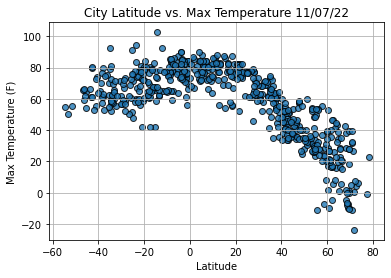

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

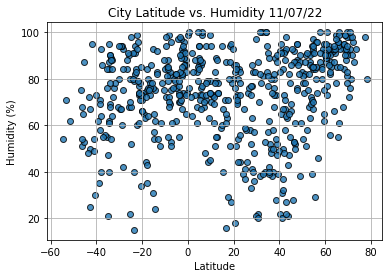

In [15]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

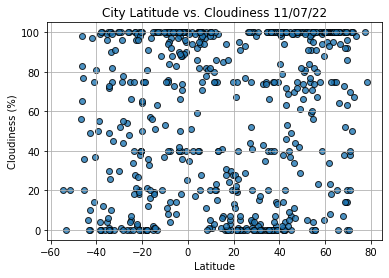

In [16]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

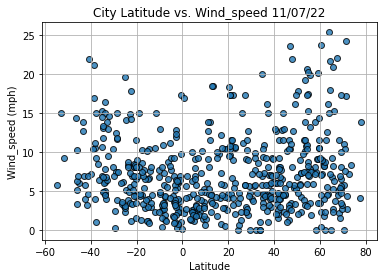

In [17]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

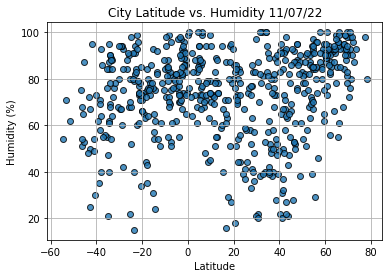

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

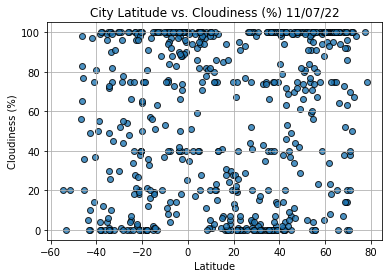

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

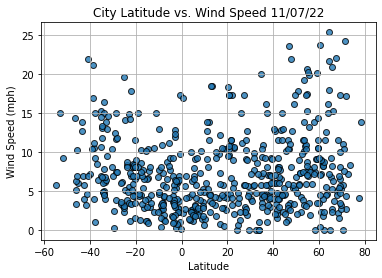

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()